# Librerias

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')

# Dataset


In [61]:
df = pd.read_csv("/content/drive/MyDrive/Henry/movies_df.csv")

In [62]:
df.head(1)

,id,title,cast,director,release_date,release_year,genres,budget,revenue,return,runtime,status,original_language,production_countries,popularity,vote_average,vote_count,overview
0,862,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,1995-10-30,1995,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,12.451801,81.0,Released,en,['US'],21.946943,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."


# Preparación de los datos


## Campos relevantes
>Se eliminan todos los campos que no dan información relevante para recomendar más películas o son redundantes con otras columnas.


In [63]:
df.drop(['id', 'release_date', 'status', 'budget', 'revenue', 'original_language', 'return', 'popularity', 'production_countries'], axis = 1, inplace = True)

In [64]:
df.head()

,title,cast,director,release_year,genres,runtime,vote_average,vote_count,overview
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,1995,"['Animation', 'Comedy', 'Family']",81.0,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,1995,"['Adventure', 'Fantasy', 'Family']",104.0,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",Howard Deutch,1995,"['Romance', 'Comedy']",101.0,6.5,92.0,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,1995,"['Comedy', 'Drama', 'Romance']",127.0,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,"['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer,1995,['Comedy'],106.0,5.7,173.0,Just when George Banks has recovered from his ...


In [65]:
df.dtypes

title            object
cast             object
director         object
release_year      int64
genres           object
runtime         float64
vote_average    float64
vote_count      float64
overview         object
dtype: object

In [66]:
df.drop_duplicates(inplace= True) # El EDA habia denotado que habia unos registros duplicados, asi que se eliminan

### Campos numéricos

In [67]:
df.describe()

,release_year,runtime,vote_average,vote_count
count,45348.000000,45102.000000,45348.000000,45348.000000
mean,1991.881340,94.179327,5.624188,110.135596
std,24.053997,38.345530,1.915301,491.888464
min,1874.000000,0.000000,0.000000,0.000000
25%,1978.000000,85.000000,5.000000,3.000000
50%,2001.000000,95.000000,6.000000,10.000000
75%,2010.000000,107.000000,6.800000,34.000000
max,2020.000000,1256.000000,10.000000,14075.000000


#### Vote average y vote count
>Primero se eligen las películas más populares según la cantidad de votos (con más de 350) para poder disminuir la cantidad de datos y lograr la implementación en Render.


>Luego se decide combinar estas dos columnas generando una métrica ponderada >(generada con ia) que le va a dar más importancia a los promedios que tengan más votos, de esta forma si dos películas tienen el mismo vote_average pero una tiene más votos que la otra, esta va a tener mayor puntuación si la puntuación es buena, dándole así un componente de popularidad.


>Y una vez que se tienen los nuevos valores de la métrica, se clasifica las películas:


>> **Hasta 4 puntos:** mala


>> **Entre 4 y 6 puntos:** regular


>> **Entre 6 y 9 puntos:** buena


>> **De más de 9 puntos:** excelente


In [68]:
df['vote_count'].describe()

count    45348.000000
mean       110.135596
std        491.888464
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [69]:
df.drop(df[df['vote_count'] < 350].index, inplace=True) # Se eliminan las peliculas menos populares

In [70]:
df['vote_count'].describe()

count     2710.000000
mean      1390.001845
std       1503.974549
min        350.000000
25%        508.000000
50%        830.000000
75%       1595.000000
max      14075.000000
Name: vote_count, dtype: float64

In [71]:
m = df['vote_count'].quantile(0.90) #  Número mínimo de votos que una película debe tener para ser considerada en el cálculo de la calificación ponderada.
C = df['vote_average'].mean()

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    if v >= m:
        return R + (v / (v + m) * (R - C)) # Si el número de votos (v) es mayor o igual que el umbral (m).
    else:
        return R + (v / (v + m) * R * 0.1)

df['weighted_rating'] = df.apply(weighted_rating, axis=1)

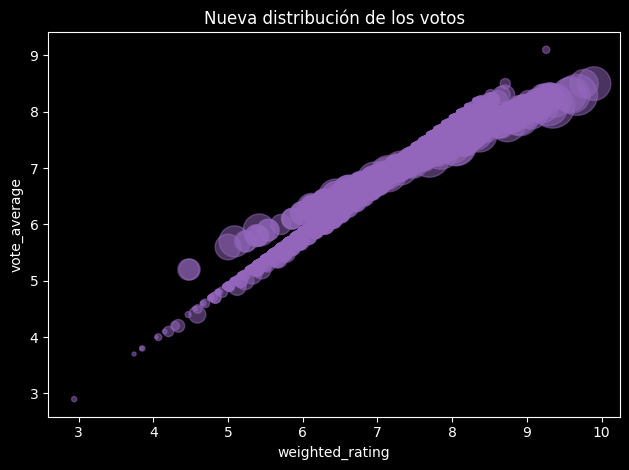

In [72]:
min_size = 5
max_size = 1000

scaled_size = min_size + (df['vote_count'] - df['vote_count'].min()) / (df['vote_count'].max() - df['vote_count'].min()) * (max_size - min_size)
plt.scatter(df['weighted_rating'], df['vote_average'], s=scaled_size, alpha=0.5, color='tab:purple')
plt.title('Nueva distribución de los votos')
plt.xlabel('weighted_rating')
plt.ylabel('vote_average')

plt.tight_layout()
plt.show()

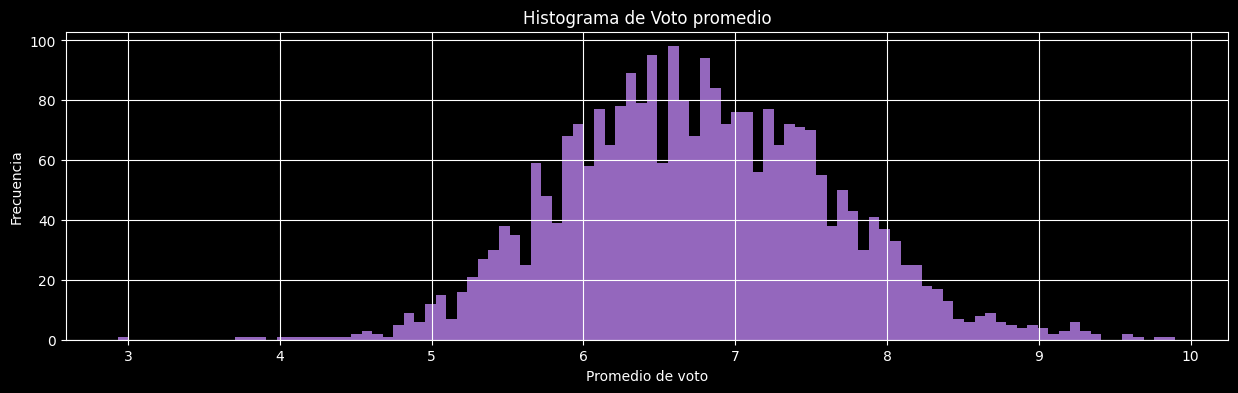

In [73]:
plt.figure(figsize=(15,4))
df['weighted_rating'].hist(bins=100,color='tab:purple')
plt.xlabel('Promedio de voto')
plt.ylabel('Frecuencia')
plt.title('Histograma de Voto promedio')
plt.show()

In [74]:
df.drop(['vote_average', 'vote_count'], axis = 1, inplace = True)

In [75]:
condiciones = [
    (df['weighted_rating'] > 0) & (df['weighted_rating'] < 4),
    (df['weighted_rating'] >= 4) & (df['weighted_rating'] < 6),
    (df['weighted_rating'] >= 6) & (df['weighted_rating'] < 9),
    (df['weighted_rating'] >= 9) ]

valores = ['mala', 'regular', 'buena', 'excelente']
df['weighted_rating'] = np.select(condiciones, valores, default = df['weighted_rating'])

In [76]:
df.drop(df[df['weighted_rating'] == 'mala'].index, inplace=True) # Para no recomendar peliculas consideradas malas

In [77]:
df['weighted_rating'].value_counts()

weighted_rating
buena        2136
regular       545
excelente      25
Name: count, dtype: int64

#### Runtime
> Como se ven en el describe, originalmente las duraciones van desde 0 a 1256 minutos (más de 20 horas). Es por eso que se va a reclasificar:

>> **Hasta 2 horas:** De menos de 120 minutos son películas cortas (o sin datos pero se acepta el error)

>> **Entre 2 y 3 horas:** De 120 a 180 minutos son películas medias

>> **De más de 3 horas:** De 180 son películas largas


In [78]:
df['runtime'].describe()

count    2706.000000
mean      111.098300
std        24.168171
min         3.000000
25%        97.000000
50%       108.000000
75%       122.000000
max       705.000000
Name: runtime, dtype: float64

In [79]:
df.drop(df[df['runtime'] > 240].index, inplace=True) # Se va a considerar que una película puede durar máximo 4 horas para no considerarse miniserie

In [80]:
df['runtime'].describe()

count    2705.000000
mean      110.878743
std        21.303164
min         3.000000
25%        97.000000
50%       108.000000
75%       122.000000
max       238.000000
Name: runtime, dtype: float64

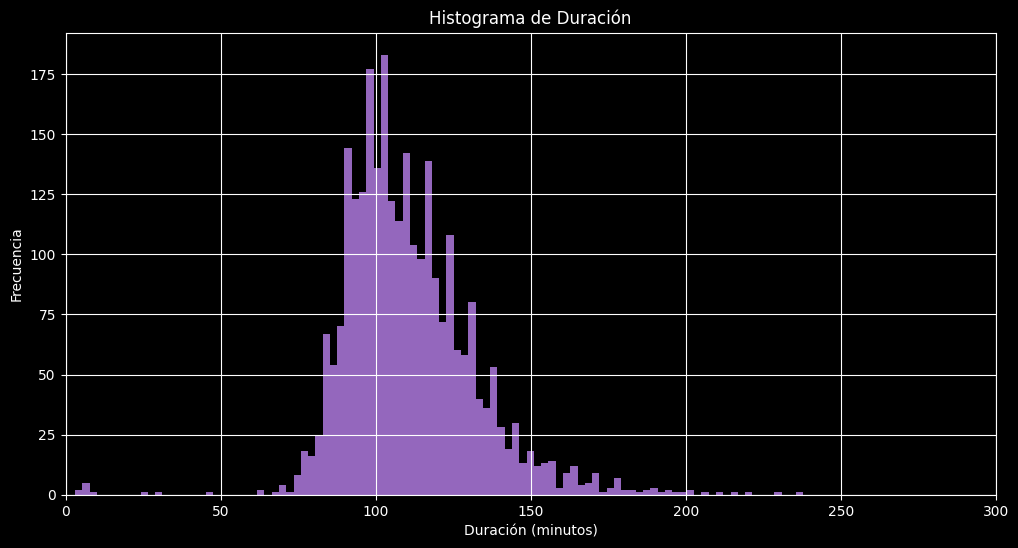

In [81]:
plt.figure(figsize=(12,6))
df['runtime'].hist(bins=100,color='tab:purple')
plt.xlim(0, 300)
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración')
plt.show()

In [82]:
condiciones = [
    (df['runtime'] < 120.0),
    (df['runtime'] >= 120.0) & (df['runtime'] < 180.0),
    (df['runtime'] >= 180.0)]

valores = ['corta', 'media', 'larga']

df['runtime'] = np.select(condiciones, valores, default=df['runtime'])


In [83]:
df['runtime'].value_counts()

runtime
corta    1932
media     750
larga      23
Name: count, dtype: int64

#### Release year
> Parte importante de una película es el contexto y la tecnología con la que se grabó, es por eso que se van a clasificar según la década (teniendo en cuenta que el dataset llega hasta 2017)


>> **20s**: Veintes


>> **30s**: Treintas


>> **40s**: Cuarentas


>> **50s**: Cincuentas


>> **60s**: Sesentas


>> **70s**: Setentas


>> **80s**: Ochentas


>> **90s**: Noventas


>> **2000s**: Dosmil


>> **2010**: Actuales

In [84]:
df['release_year'].describe()

count    2705.000000
mean     2003.561183
std        13.230128
min      1921.000000
25%      1999.000000
50%      2007.000000
75%      2013.000000
max      2017.000000
Name: release_year, dtype: float64

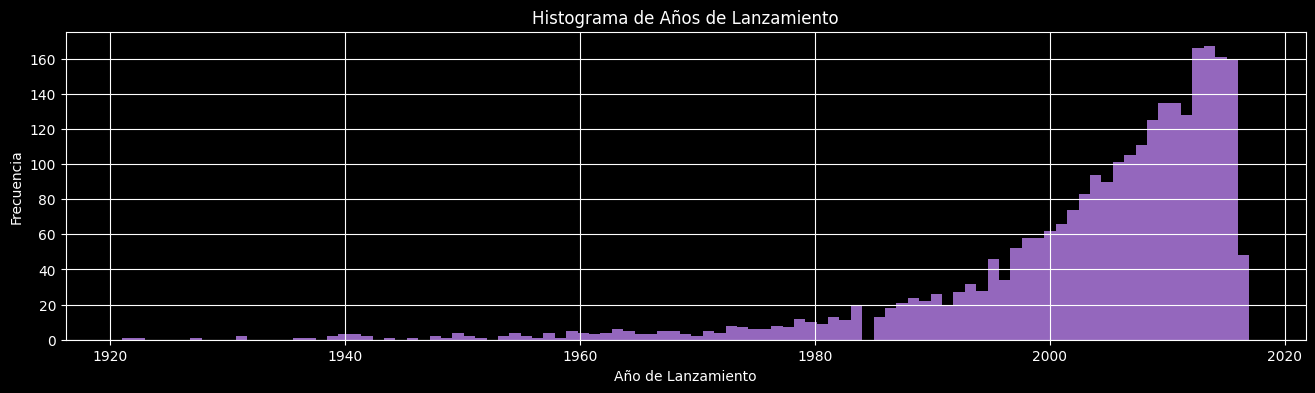

In [85]:
plt.figure(figsize=(16,4))
df['release_year'].hist(bins=99,color='tab:purple')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años de Lanzamiento')
plt.show()

In [86]:
condiciones = [
    (df['release_year'] >= 1920) & (df['release_year'] < 1930),
    (df['release_year'] >= 1930) & (df['release_year'] < 1940),
    (df['release_year'] >= 1940) & (df['release_year'] < 1950),
    (df['release_year'] >= 1950) & (df['release_year'] < 1960),
    (df['release_year'] >= 1960) & (df['release_year'] < 1970),
    (df['release_year'] >= 1970) & (df['release_year'] < 1980),
    (df['release_year'] >= 1980) & (df['release_year'] < 1990),
    (df['release_year'] >= 1990) & (df['release_year'] < 2000),
    (df['release_year'] >= 2000) & (df['release_year'] < 2010),
    (df['release_year'] >= 2010)
]

valores = ['veintes', 'treintas', 'cuarentas', 'cincuentas', 'sesentas', 'setentas', 'ochentas', 'noventas', 'dosmil', 'actuales']
df['release_year'] = np.select(condiciones, valores, default = df['release_year'])


In [87]:
print(df['release_year'].value_counts())

release_year
actuales      1100
dosmil         911
noventas       380
ochentas       160
setentas        65
sesentas        41
cincuentas      26
cuarentas       13
treintas         6
veintes          3
Name: count, dtype: int64


In [88]:
df.head()

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,noventas,"['Animation', 'Comedy', 'Family']",corta,"Led by Woody, Andy's toys live happily in his ...",buena
1,Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,noventas,"['Adventure', 'Fantasy', 'Family']",corta,When siblings Judy and Peter discover an encha...,buena
5,Heat,"['Al Pacino', 'Robert De Niro', 'Val Kilmer']",Michael Mann,noventas,"['Action', 'Crime', 'Drama', 'Thriller']",media,"Obsessive master thief, Neil McCauley leads a ...",buena
9,GoldenEye,"['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...",Martin Campbell,noventas,"['Adventure', 'Action', 'Thriller']",media,James Bond must unmask the mysterious head of ...,buena
12,Balto,"['Kevin Bacon', 'Bob Hoskins', 'Bridget Fonda']",Simon Wells,noventas,"['Family', 'Animation', 'Adventure']",corta,An outcast half-wolf risks his life to prevent...,buena


### Campos cualitativos

In [89]:
df.head(1)

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,noventas,"['Animation', 'Comedy', 'Family']",corta,"Led by Woody, Andy's toys live happily in his ...",buena


#### Cast, Director y Genres
> Se limpian los [' '] y se sacan los **espacios** para que el nombre y apellido de un actor sean una sola palabra, porque que dos actores tengan el mismo apellido no afecta la similitud entre películas. Además de conserva solo el actor principal.

In [90]:
df['director'] = df['director'].fillna("-")

In [91]:
df['cast'] = df['cast'].apply(lambda x: x.split(',')[0]) # Se guarda solo el actor principal para disminuir el peso de los datos

In [92]:
df['cast'] = df['cast'].apply(lambda x: x.strip('[]').replace("'", "").replace(" ", "").replace(",", " "))
df['genres'] = df['genres'].apply(lambda x: x.strip('[]').replace("'", "").replace(",", " "))
df['director'] = df['director'].apply(lambda x: x.replace(" ", ""))

In [93]:
df.head()

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,TomHanks,JohnLasseter,noventas,Animation Comedy Family,corta,"Led by Woody, Andy's toys live happily in his ...",buena
1,Jumanji,RobinWilliams,JoeJohnston,noventas,Adventure Fantasy Family,corta,When siblings Judy and Peter discover an encha...,buena
5,Heat,AlPacino,MichaelMann,noventas,Action Crime Drama Thriller,media,"Obsessive master thief, Neil McCauley leads a ...",buena
9,GoldenEye,PierceBrosnan,MartinCampbell,noventas,Adventure Action Thriller,media,James Bond must unmask the mysterious head of ...,buena
12,Balto,KevinBacon,SimonWells,noventas,Family Animation Adventure,corta,An outcast half-wolf risks his life to prevent...,buena


#### Overview
> A esta columna se le debe hacer un procesamiento más complejo, sacar las stopwords y se hace más eficiente la información seleccionando solo algunas palabras más representativas.

In [94]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [95]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [97]:
def preprocess_text(text):
    if isinstance(text, float) and pd.isna(text):
        return "-"  # Devolver cadena vacía si el texto es NaN
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación y caracteres no alfanuméricos
    text = text.lower()
    tokens = word_tokenize(text)  # Tokenizar
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Eliminar stop words y lematizar
    return ' '.join(tokens)  # Unir tokens de nuevo en una sola cadena

In [98]:
df['cleaned_overview'] = df['overview'].apply(preprocess_text)

In [99]:
df[['overview', 'cleaned_overview']]

,overview,cleaned_overview
0,"Led by Woody, Andy's toys live happily in his ...",led woody andys toy live happily room andys bi...
1,When siblings Judy and Peter discover an encha...,sibling judy peter discover enchanted board ga...
5,"Obsessive master thief, Neil McCauley leads a ...",obsessive master thief neil mccauley lead topn...
9,James Bond must unmask the mysterious head of ...,james bond must unmask mysterious head janus s...
12,An outcast half-wolf risks his life to prevent...,outcast halfwolf risk life prevent deadly epid...
...,...,...
44640,The miraculous evacuation of Allied soldiers f...,miraculous evacuation allied soldier belgium b...
44805,"Autobots and Decepticons are at war, with huma...",autobots decepticons war human sideline optimu...
44912,Three friends leave Milan by car heading south...,three friend leave milan car heading south two...
44976,"The last Gunslinger, Roland Deschain, has been...",last gunslinger roland deschain locked eternal...


In [100]:
df.drop(['overview'], axis = 1, inplace = True)

In [101]:
print(df['cleaned_overview'][0])

led woody andys toy live happily room andys birthday brings buzz lightyear onto scene afraid losing place andys heart woody plot buzz circumstance separate buzz woody owner duo eventually learns put aside difference


In [57]:
# df['cleaned_overview'] = df['cleaned_overview'].fillna("-")
# df['cleaned_overview'] = df['cleaned_overview'].str.replace("\n", " ")

In [102]:
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54386 sha256=7aed18d28a1ad82dd88063454aca77094941ee17d577b1fc79ca06c288e9bf71
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [103]:
from summa import keywords

In [104]:
palabras_clave_lista = []
for index, row in df.iterrows():
    texto = row['cleaned_overview']
    try:
        palabras_clave = keywords.keywords(texto, words=10).replace("\n", " ")  # Intenta extraer 10 palabras clave por texto
    except IndexError:
        try:
          palabras_clave = keywords.keywords(texto, words=5).replace("\n", " ")  # Intenta extraer 5 palabras clave por texto
        except IndexError:
          palabras_clave = []  # En caso de error, asigna una lista vacía


    palabras_clave_lista.append(palabras_clave)

df['palabras_clave'] = palabras_clave_lista


In [105]:
print(df['palabras_clave'][0])
print(df['cleaned_overview'][0])

woody andys buzz duo eventually difference afraid losing place
led woody andys toy live happily room andys birthday brings buzz lightyear onto scene afraid losing place andys heart woody plot buzz circumstance separate buzz woody owner duo eventually learns put aside difference


In [106]:
df_expanded = df['cleaned_overview'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
overview_counts=df_expanded.value_counts()

df_expanded2 = df['palabras_clave'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
claves_counts=df_expanded2.value_counts()


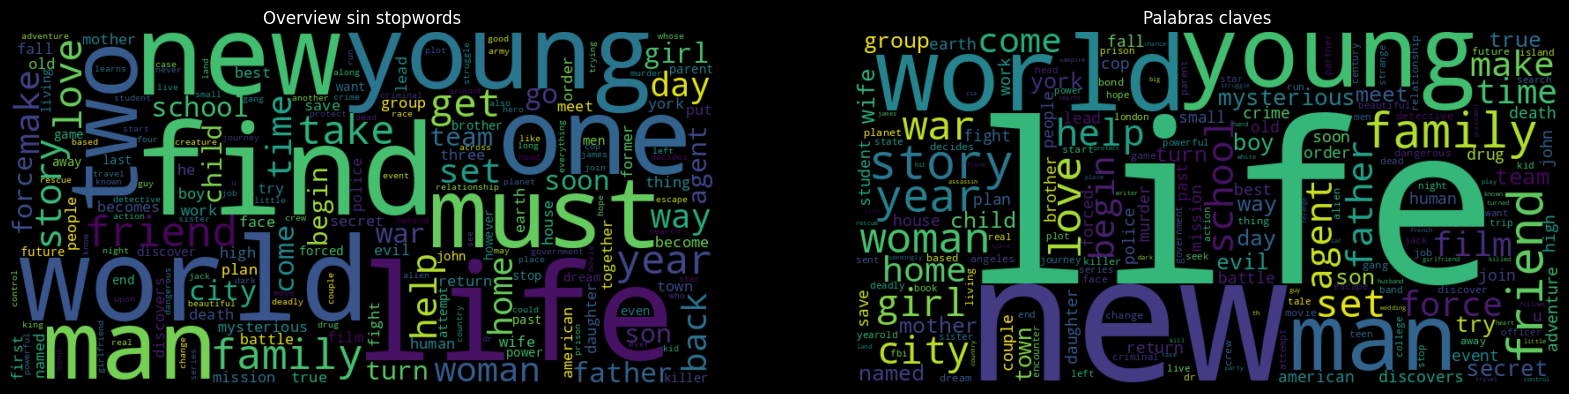

In [107]:
wordcloud1 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(overview_counts)
wordcloud2 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(claves_counts)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Mostrar la primera nube de palabras en la primera subplot
axs[0].imshow(wordcloud1, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Overview sin stopwords')

# Mostrar la segunda nube de palabras en la segunda subplot
axs[1].imshow(wordcloud2, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Palabras claves')

# Mostrar la figura completa
plt.show()

## Dataset final

In [108]:
df

,title,cast,director,release_year,genres,runtime,weighted_rating,cleaned_overview,palabras_clave
0,Toy Story,TomHanks,JohnLasseter,noventas,Animation Comedy Family,corta,buena,led woody andys toy live happily room andys bi...,woody andys buzz duo eventually difference afr...
1,Jumanji,RobinWilliams,JoeJohnston,noventas,Adventure Fantasy Family,corta,buena,sibling judy peter discover enchanted board ga...,game alan alans giant rhinoceros evil monkey t...
5,Heat,AlPacino,MichaelMann,noventas,Action Crime Drama Thriller,media,buena,obsessive master thief neil mccauley lead topn...,obsessive master thief neil mccauley lead topn...
9,GoldenEye,PierceBrosnan,MartinCampbell,noventas,Adventure Action Thriller,media,buena,james bond must unmask mysterious head janus s...,james bond mysterious head janus syndicate pre...
12,Balto,KevinBacon,SimonWells,noventas,Family Animation Adventure,corta,buena,outcast halfwolf risk life prevent deadly epid...,alaska
...,...,...,...,...,...,...,...,...,...
44640,Dunkirk,FionnWhitehead,ChristopherNolan,actuales,Action Drama History Thriller War,corta,buena,miraculous evacuation allied soldier belgium b...,france th evacuation allied soldier belgium wo...
44805,Transformers: The Last Knight,MarkWahlberg,MichaelBay,actuales,Action Science Fiction Thriller Adventure,media,buena,autobots decepticons war human sideline optimu...,decepticons war human sideline optimus secret ...
44912,Three Men and a Leg,AldoBaglio,MassimoVenier,noventas,Comedy,corta,buena,three friend leave milan car heading south two...,friend leave milan car heading south like going
44976,The Dark Tower,IdrisElba,NikolajArcel,actuales,Action Western Science Fiction Fantasy Horror,corta,regular,last gunslinger roland deschain locked eternal...,roland man tower hold battle walter world stak...


In [110]:
df['palabras_clave'] = df['palabras_clave'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [111]:
df['tags'] = df['palabras_clave'] + " " + df['genres'] + " " + df['weighted_rating'] + " " + df['release_year'] + " " + df['runtime'] + " " + df['director'] + " " + df['cast']

In [112]:
df['tags'][0]

'woody andys buzz duo eventually difference afraid losing place Animation  Comedy  Family buena noventas corta JohnLasseter TomHanks'

In [113]:
df.head(1)

,title,cast,director,release_year,genres,runtime,weighted_rating,cleaned_overview,palabras_clave,tags
0,Toy Story,TomHanks,JohnLasseter,noventas,Animation Comedy Family,corta,buena,led woody andys toy live happily room andys bi...,woody andys buzz duo eventually difference afr...,woody andys buzz duo eventually difference afr...


In [114]:
df.drop(['cast', 'director', 'release_year', 'genres', 'runtime', 'weighted_rating', 'cleaned_overview', 'palabras_clave'], axis = 1, inplace = True)

In [115]:
df.head()

,title,tags
0,Toy Story,woody andys buzz duo eventually difference afr...
1,Jumanji,game alan alans giant rhinoceros evil monkey t...
5,Heat,obsessive master thief neil mccauley lead topn...
9,GoldenEye,james bond mysterious head janus syndicate pre...
12,Balto,alaska Family Animation Adventure buena nove...


In [116]:
df.to_csv('recomendacion_df.csv', index=False)

# Algoritmo de recomendación

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
cv = CountVectorizer(max_features=5000, stop_words="english")

In [119]:
vectors = cv.fit_transform(df["tags"]).toarray()

In [120]:
simil = cosine_similarity(vectors)

In [121]:
np.save('vectors.npy', vectors)
np.save('simil.npy', simil)

## Prueba

In [122]:
df = pd.read_csv("/content/recomendacion_df.csv")

In [123]:
df.shape

(2705, 2)

In [124]:
simil = np.load('/content/simil.npy')

In [125]:
def recommend(title):
    df['title1'] = df['title'].str.lower()
    title1 = title.lower()
    if title1 in df['title1'].values:
        movie_index = df[df["title1"] == title1].index[0]
        distances = simil[movie_index]
        movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

        pel = []
        for i in movie_list:
            list_pel = {df.iloc[i[0]].title}
            pel.append(list_pel)
        return pel
    else:
        return(f'La película "{title}" no se encuentra en la base de datos, prueve nuevamente con otro título')

In [126]:
recommend("Now You See Me")

[{'Takers'}, {'Headhunters'}, {'RED 2'}, {'The Maltese Falcon'}, {'Imperium'}]

In [127]:
recommend("Now you see Me")

[{'Takers'}, {'Headhunters'}, {'RED 2'}, {'The Maltese Falcon'}, {'Imperium'}]

In [ ]:
recommend("Now u see Me")

'La película "Now u see Me" no se encuentra en la base de datos, prueve nuevamente con otro título'

In [ ]:
recommend("Lethal Weapon")

[{'Lethal Weapon 2'},
 {'Lethal Weapon 3'},
 {'Lethal Weapon 4'},
 {'Tequila Sunrise'},
 {'Lock Up'}]

In [ ]:
recommend('The Lion King')

[{'Beauty and the Beast: The Enchanted Christmas'},
 {"The Lion King 2: Simba's Pride"},
 {"Geri's Game"},
 {'Tarzan'},
 {'Quest for Camelot'}]

In [ ]:
recommend('Dirty Dancing')

[{'Footloose'},
 {'Tomboy'},
 {'Sixteen Candles'},
 {'The Cyclone'},
 {'Steel Magnolias'}]

In [ ]:
recommend('Batman Returns')

[{'Batman'}, {'Batman Forever'}, {'Wolf'}, {'The 13th Warrior'}, {'GoldenEye'}]

In [ ]:
recommend('Star Trek II: The Wrath of Khan')

[{'Star Trek III: The Search for Spock'},
 {'Star Trek VI: The Undiscovered Country'},
 {'Star Trek V: The Final Frontier'},
 {'Star Trek IV: The Voyage Home'},
 {'Mad Max 2: The Road Warrior'}]

In [ ]:
recommend("Rocky")

[{'Rocky IV'}, {'Rocky III'}, {'Rocky II'}, {'Rocky V'}, {'Rocky Balboa'}]